In [45]:
import numpy as np

R = np.array([[3,0,1,3,1], [1,0,4,1,0], [3,1,0,3,1], [0,3,0,4,4]])

num_users, num_items = R.shape # (4,5)
K = 2

U = np.random.rand(num_users, K) # (4,2)
V = np.random.rand(num_items, K) # (5,2)

print('Initial user features matrix:')
print(U)

print('Initial item feature matrix:')
print(V)

Initial user features matrix:
[[0.33013574 0.22425662]
 [0.72268414 0.17814879]
 [0.63808851 0.13824207]
 [0.09570444 0.03089309]]
Initial item feature matrix:
[[0.34915602 0.80735   ]
 [0.25216607 0.60652343]
 [0.63342858 0.66830886]
 [0.0894173  0.01314943]
 [0.11272791 0.93004742]]


In [46]:
R_hat = np.dot(U, V.T)

print('Reconstructed rating matrix:')
print(R_hat) # 초기 예측값

Reconstructed rating matrix:
[[0.29632246 0.21926593 0.3589901  0.03246869 0.2457848 ]
 [0.39615794 0.29028783 0.5768272  0.06696302 0.24715349]
 [0.33440218 0.24475133 0.4965719  0.05887395 0.20050207]
 [0.05835732 0.04287079 0.08126805 0.00896386 0.0395206 ]]


In [47]:
def calcTotalErrors(R, U, V): # 잔차 계산 함수
    E = R - np.dot(U, V.T)
    
    error = 0
    for i in range(num_users):
        for j in range(num_items):
            if R[i,j] > 0:
                error += E[i,j]**2
    error = error/2

    return error

In [48]:
error1 = calcTotalErrors(R, U, V)
print('Current error:', error1)

Current error: 43.686377578307955


In [49]:
tol = 0.00001
alpha = 0.01

while error1 > tol:
    for i in range(num_users):
        for j in range(num_items):
            if R[i,j] > 0:
                e = R[i,j] - np.dot(U[i], V[j])
                new_ui = U[i] + alpha * e * V[j] # gradient descent
                new_vj = V[j] + alpha * e * U[i]

                U[i] = new_ui
                V[j] = new_vj
    error1 = calcTotalErrors(R, U, V)

In [50]:
print('Trained User Feature Matrix:')
print(U)

print('Trained Item Feature Matrix:')
print(V)

print("Reconstructed Rating Matrix:")
print(np.dot(U, V.T))

Trained User Feature Matrix:
[[ 1.15567812  0.98092859]
 [ 1.9191797  -0.74652905]
 [ 1.15936867  0.9789944 ]
 [-0.09461171  2.45410327]]
Trained Item Feature Matrix:
[[ 1.17285573  1.67602274]
 [-0.16273007  1.2159092 ]
 [ 1.70144279 -0.98370017]
 [ 1.17296785  1.67532565]
 [-0.49950515  1.61064679]]
Reconstructed Rating Matrix:
[[ 2.99950233  1.00465651  1.00138058  2.99894811  1.00266232]
 [ 0.99972124 -1.22001979  3.99973522  1.00045682 -2.16103476]
 [ 3.00058905  1.00170414  1.00956251  3.0000366   0.99770356]
 [ 4.00216701  2.99936291 -2.5750782   4.00044567  3.99995258]]


In [55]:
import numpy as np

R = np.array([[3,0,1,3,1], [1,0,4,1,0], [3,1,0,3,1], [0,3,0,4,4]])

num_users, num_items = R.shape # (4,5)
K = 2

U = np.random.rand(num_users, K) # (4,2)
V = np.random.rand(num_items, K) # (5,2)

print('Initial user features matrix:')
print(U)

print('Initial item feature matrix:')
print(V)

Initial user features matrix:
[[0.21993999 0.40597564]
 [0.90165046 0.65133991]
 [0.21919    0.83735714]
 [0.12251895 0.49236208]]
Initial item feature matrix:
[[0.48690583 0.70592944]
 [0.7761058  0.06871366]
 [0.41963502 0.54828812]
 [0.95842852 0.69848405]
 [0.20350345 0.72273327]]


In [56]:
tol = 0.00001
alpha = 0.01
lstError = []

error = calcTotalErrors(R, U, V)
lstError.append(error)

while error > tol:
    for i in range(num_users):
        for j in range(num_items):
            if R[i,j] > 0:
                e = R[i,j] - np.dot(U[i], V[j]) # 잔차 계산
                new_ui = U[i] + alpha * e * V[j] # gradient descent
                new_vj = V[j] + alpha * e * U[i]

                U[i] = new_ui
                V[j] = new_vj
    
    error = calcTotalErrors(R, U, V)
    lstError.append(error)

In [57]:
lstError

[34.7464891957401,
 32.80340593065243,
 30.831708322469858,
 28.845653778375144,
 26.86393193937149,
 24.90840365494641,
 23.002565127384862,
 21.169847674966984,
 19.43191694421902,
 17.807159388099617,
 16.309529369707544,
 14.947878425595574,
 13.725811113070806,
 12.642028987243378,
 11.691055885554125,
 10.864198134197835,
 10.150586965374794,
 9.538172204633899,
 9.014575032483076,
 8.567750989878627,
 8.186452595028538,
 7.860508526181659,
 7.580952056528363,
 7.34003696609955,
 7.131177515805981,
 6.94884337517761,
 6.788433170484969,
 6.646143244427827,
 6.518842195906292,
 6.403957125249054,
 6.2993742160122395,
 6.203354130002141,
 6.114461411209237,
 6.031506432545034,
 5.953498165744998,
 5.879606050124184,
 5.809129367949974,
 5.741472729171834,
 5.676126480644556,
 5.612651059045573,
 5.550664489588835,
 5.489832389526559,
 5.429859966043836,
 5.370485604611332,
 5.311475729314083,
 5.2526206845013865,
 5.193731440502068,
 5.1346369679417165,
 5.075182157766589,
 5.01522

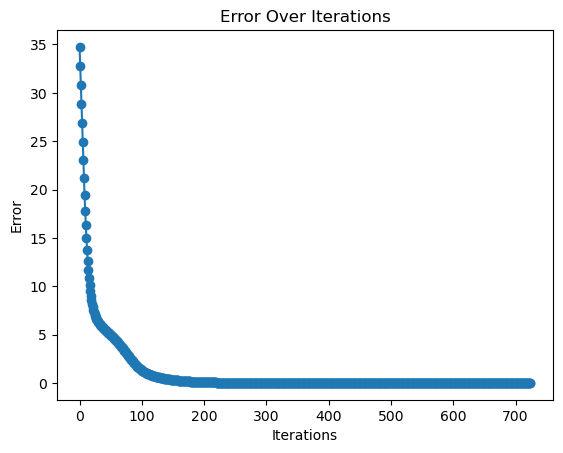

In [58]:
import matplotlib.pyplot as plt

plt.plot(lstError, marker='o')
plt.title('Error Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

In [59]:
np.save('user_matrix.npy', U)
np.save('item_matrix.npy', V)

loaded_U = np.load('user_matrix.npy')
loaded_V = np.load('item_matrix.npy')

In [60]:
def estimate_rating(U, V, userIndex, itemIndex):
    estimated_ratings = np.dot(U[userIndex], V[itemIndex].T)

    return estimated_ratings

estimateRating = estimate_rating(U, V, 2, 3)
print('Estimated rating of user 3 for item 4:', estimateRating)

Estimated rating of user 3 for item 4: 2.999932951276977


In [61]:
import numpy as np
import matplotlib.pyplot as plt

class MF:
    def __init__(self, R, K, alpha, tol):
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.tol = tol

        self.U = np.random.rand(self.num_users, self.K)
        self.V = np.random.rand(self.num_items, self.K)

    def calcTotalErrors(self):
        E = self.R - np.dot(self.U, self.V.T)
        error = 0
        for i in range(self.num_users):
            for j in range(self.num_items):
                if self.R[i,j] > 0:
                    error += E[i,j] ** 2

        return error
    
    def train(self):
        itr = 0
        self.lstError = []

        error = self.calcTotalErrors()
        self.lstError.append(error)

        while error > self.tol:
            for i in range(self.num_users):
                for j in range(self.num_items):
                    if self.R[i,j] > 0:
                        e = self.R[i,j] - np.dot(self.U[i], self.V[j])
                        new_ui = self.U[i] + self.alpha * e* self.V[j]
                        new_vj = self.V[j] + self.alpha * e* self.U[i]

                        self.U[i] = new_ui
                        self.V[j] = new_vj

                    itr += 1
                    error = self.calcTotalErrors()
                    self.lstError.append(error)

                    print(f'Current iter: {itr}, with Error {error}')

    def plotErrorTrajectory(self):
        plt.plot(self.lstError, marker='o')
        plt.title('Error Over Iterations')
        plt.xlabel('Iterations')
        plt.ylabel('Error')
        plt.show()

    def saveModel(self):
        np.save('user_matrix.npy', self.U)
        np.save('item_mtrix.npy', self.V)

    def loadModel(self):
        self.U = np.load('user_matrix.npy')
        self.V = np.load('item_matrix.npy')

    def estimate_rating(self, i, j):
        estimated_ratings = np.dot(self.U[i], self.V[j].T)

        return estimated_ratings

Current iter: 1, with Error 65.16033370451018
Current iter: 2, with Error 65.16033370451018
Current iter: 3, with Error 65.08805289974818
Current iter: 4, with Error 64.67352400489123
Current iter: 5, with Error 64.68951991963927
Current iter: 6, with Error 64.68829268371712
Current iter: 7, with Error 64.68829268371712
Current iter: 8, with Error 64.35357200830454
Current iter: 9, with Error 64.31710210340853
Current iter: 10, with Error 64.31710210340853
Current iter: 11, with Error 63.962582859647085
Current iter: 12, with Error 63.91274113085263
Current iter: 13, with Error 63.91274113085263
Current iter: 14, with Error 63.49420069242655
Current iter: 15, with Error 63.5015540588866
Current iter: 16, with Error 63.5015540588866
Current iter: 17, with Error 63.26030564560368
Current iter: 18, with Error 63.26030564560368
Current iter: 19, with Error 62.474534199475976
Current iter: 20, with Error 61.789652630690384
Current iter: 21, with Error 61.461701507575484
Current iter: 22, wi

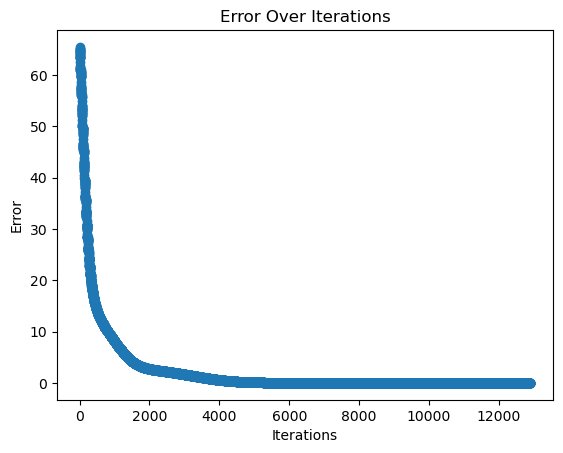

Estimated rating: <function estimate_rating at 0x000002B708F8C2C0>


In [62]:
R = np.array([[3,0,1,3,1], [1,0,4,1,0], [3,1,0,3,1], [0,3,0,4,4]])

K = 2
alpha = 0.01
tol = 0.0001

mf_model = MF(R, K, alpha, tol)
mf_model.train()
mf_model.plotErrorTrajectory()
mf_model.saveModel()

estimated_rating = mf_model.estimate_rating(1,2)
print('Estimated rating:', estimate_rating)

# Apply Dataset

In [101]:
import numpy as np
import matplotlib.pyplot as plt

class MF:
    def __init__(self, R, K, alpha, tol):
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.tol = tol

        self.U = np.random.rand(self.num_users, self.K)
        self.V = np.random.rand(self.num_items, self.K)


    
    def calcTotalErrors(self, lambda_parameter=0.001): # lambda : regularization parameter
        E = self.R - np.dot(self.U, self.V.T)
        error = 0
    
        for i in range(self.num_users):
            for j in range(self.num_items):
                if self.R[i,j] > 0:
                    error += E[i,j] ** 2
    
        # Regularization term 추가
        regularization_U = np.sum(self.U ** 2)  # U의 L2 노름 제곱
        regularization_V = np.sum(self.V ** 2)  # V의 L2 노름 제곱
        error += (lambda_parameter / 2) * (regularization_U + regularization_V)  # L2 regularization

        error = error / 2  # 오차를 절반으로 나누기

        return error


    def train(self, max_iter=100):
        itr = 0
        self.lstError = []

        error = self.calcTotalErrors()
        self.lstError.append(error)

        while error > self.tol and itr < max_iter: # 최대 반복 횟수 지정
            for i in range(self.num_users):
                for j in range(self.num_items):
                    if self.R[i,j] > 0:
                        e = self.R[i,j] - np.dot(self.U[i], self.V[j])
                        new_ui = self.U[i] + self.alpha * e* self.V[j]
                        new_vj = self.V[j] + self.alpha * e* self.U[i]

                        self.U[i] = new_ui
                        self.V[j] = new_vj

            itr += 1
            error = self.calcTotalErrors()
            self.lstError.append(error)

            print(f'Current iter: {itr}, with Error {error}')

    def plotErrorTrajectory(self):
        plt.plot(self.lstError, marker='o')
        plt.title('Error Over Iterations')
        plt.xlabel('Iterations')
        plt.ylabel('Error')
        plt.show()

    def saveModel(self):
        np.save('user_matrix.npy', self.U)
        np.save('item_mtrix.npy', self.V)

    def loadModel(self):
        self.U = np.load('user_matrix.npy')
        self.V = np.load('item_matrix.npy')

    def estimate_rating(self, i, j):
        estimated_ratings = np.dot(self.U[i], self.V[j].T)

        return estimated_ratings

In [102]:
import pandas as pd

rawRatings = pd.read_csv('ratings.csv')
rawMovies = pd.read_csv('movies.csv')

rawData = pd.merge(rawRatings, rawMovies, on = 'movieId')
userMovieRating = rawData.pivot_table('rating', index='userId', columns='title')
userMovieRating = userMovieRating.fillna(0)

userMovieRating.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Current iter: 1, with Error 142807.0964525182
Current iter: 2, with Error 76189.2098416487
Current iter: 3, with Error 56127.33239971259
Current iter: 4, with Error 45185.0730499068
Current iter: 5, with Error 37980.97000972061
Current iter: 6, with Error 32751.919370138374
Current iter: 7, with Error 28726.291362103566
Current iter: 8, with Error 25506.75856645826
Current iter: 9, with Error 22865.044482459525
Current iter: 10, with Error 20658.27577749133
Current iter: 11, with Error 18790.33278350334
Current iter: 12, with Error 17192.620491207013
Current iter: 13, with Error 15814.025090520143
Current iter: 14, with Error 14615.360197632466
Current iter: 15, with Error 13566.026523296372
Current iter: 16, with Error 12641.80594399519
Current iter: 17, with Error 11823.299976893974
Current iter: 18, with Error 11094.787161416845
Current iter: 19, with Error 10443.380314957374
Current iter: 20, with Error 9858.405732664238
Current iter: 21, with Error 9330.945448454364
Current iter: 

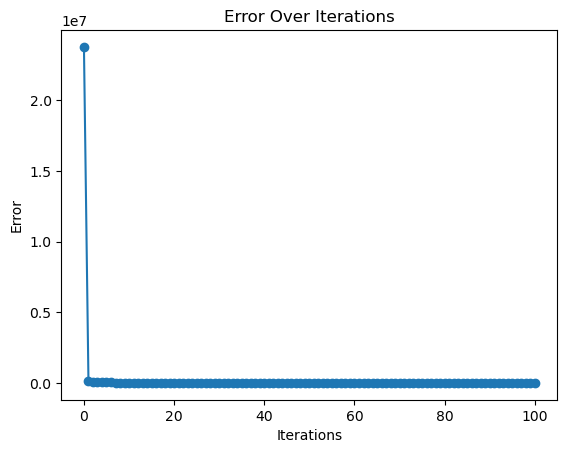

Estimated rating: 2.9381945322818215


In [104]:
R = np.array(userMovieRating)

K = 100
alpha = 0.01
tol = 0.0001

mf_model = MF(R, K, alpha, tol)
mf_model.train()
mf_model.plotErrorTrajectory()
mf_model.saveModel()

estimated_rating = mf_model.estimate_rating(1,2)
print('Estimated rating:', estimated_rating)